### data analysis on data base "Tips" from seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = sns.load_dataset("tips")


In [ ]:
data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


###Scatter plot of total bill vs. tip amount.


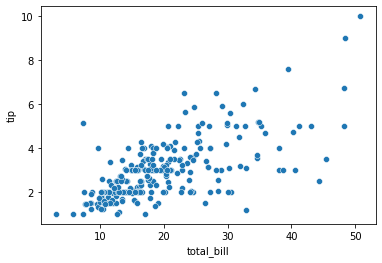

In [ ]:
sns.scatterplot(data=data, x="total_bill", y="tip")

In [ ]:
print("Tabels with 2 or more people \n\n{0}".format(data.query("size > 2")))
print("Median of the total bill \n\n{0}".format(data["total_bill"].median()))
print("\nThe standard deviation of the total_bill is \n\n{0}".format(data["total_bill"].std()))

Tabels with 2 or more people 

     total_bill   tip     sex smoker  day    time  size
1         10.34  1.66    Male     No  Sun  Dinner     3
2         21.01  3.50    Male     No  Sun  Dinner     3
4         24.59  3.61  Female     No  Sun  Dinner     4
5         25.29  4.71    Male     No  Sun  Dinner     4
7         26.88  3.12    Male     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
227       20.45  3.00    Male     No  Sat  Dinner     4
230       24.01  2.00    Male    Yes  Sat  Dinner     4
231       15.69  3.00    Male    Yes  Sat  Dinner     3
238       35.83  4.67  Female     No  Sat  Dinner     3
239       29.03  5.92    Male     No  Sat  Dinner     3

[84 rows x 7 columns]
Median of the total bill 

17.795

The standard deviation of the total_bill is 

8.902411954856856


###Customize the scatter plot.

Text(0, 0.5, 'Tip Amount')

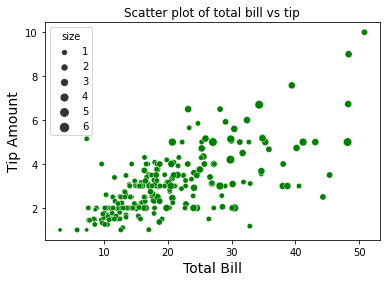

In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=data,color = "green", size="size")
plt.title("Scatter plot of total bill vs tip")
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Tip Amount", fontsize=14)


###Histogram of the tip amount.


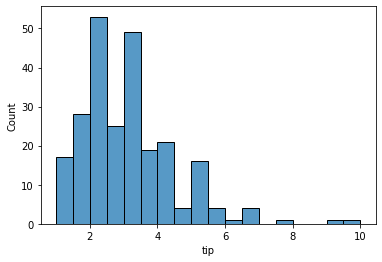

In [ ]:
sns.histplot(data=data, x="tip")

###Testing the hypothesis that the mean tip is more than $2.8. With one sample t-test using the scipy library.


In [ ]:
from scipy import stats

def t_test(t_value,p_value,alpha):
  one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

  print('Test statistic is {0}'.format(float("{:.6f}".format(t_value))))
  print('p-value for one tailed test is {0}'.format(one_tailed_p_value))

  if one_tailed_p_value<=alpha:
    print('Conclusion: Since p-value(={0}) < alpha(={1:.2f}) We reject the null hypothesis H0'.format(one_tailed_p_value,alpha))
  else:
    print('Conclusion: Since p-value(={0}) > alpha(={1:.2f}) We do not reject the null hypothesis H0'.format(one_tailed_p_value,alpha))


mu = 2.8
alpha = 0.05
tips = data["tip"]

t_value,p_value=stats.ttest_1samp(tips,mu)

t_test(t_value,p_value,alpha)




Test statistic is 2.238455
p-value for one tailed test is 0.013049
Conclusion: Since p-value(=0.013049) < alpha(=0.05) We reject the null hypothesis H0


###Checking the hypothesis if people leave more than $1 per person. In two ways:

a) Check t-test paired.

b) check t-test 1 sample.

In [ ]:
from scipy import stats

alpha = 0.05
#A
t_value,p_value=stats.ttest_rel(data["tip"],data["size"])
t_test(t_value,p_value,alpha)

print()

#B
mu = 1
tips = data["tip"]/data["size"]

t_value,p_value=stats.ttest_1samp(tips,mu)

t_test(t_value,p_value,alpha)

Test statistic is 5.410447
p-value for one tailed test is 0.0
Conclusion: Since p-value(=0.0) < alpha(=0.05) We reject the null hypothesis H0

Test statistic is 6.759019
p-value for one tailed test is 0.0
Conclusion: Since p-value(=0.0) < alpha(=0.05) We reject the null hypothesis H0


###Grouping and calculating mean by day

In [ ]:
data.groupby(["day"]).mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


###Filtering and calculating statistics

* Using Pandas query() function to filter the data based on the condition that the "size" column is greater than 2.

* Using the Pandas median() function to calculate the median of the "total_bill" column for the filtered data.

* Using the Pandas std() function to calculate the standard deviation of the "total_bill" column for the filtered data.


In [ ]:

filterdData = data.query("size > 2")
print("Tables with 3 or more people: \n\n {0} \n".format(filterdData))
print("Median of the total bill is: {0} \n".format(filterdData["total_bill"].median()))
print("The standard deviation of the total bill is: {0} \n".format(filterdData["total_bill"].std()))

Tables with 3 or more people: 

      total_bill   tip     sex smoker  day    time  size
1         10.34  1.66    Male     No  Sun  Dinner     3
2         21.01  3.50    Male     No  Sun  Dinner     3
4         24.59  3.61  Female     No  Sun  Dinner     4
5         25.29  4.71    Male     No  Sun  Dinner     4
7         26.88  3.12    Male     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
227       20.45  3.00    Male     No  Sat  Dinner     4
230       24.01  2.00    Male    Yes  Sat  Dinner     4
231       15.69  3.00    Male    Yes  Sat  Dinner     3
238       35.83  4.67  Female     No  Sat  Dinner     3
239       29.03  5.92    Male     No  Sat  Dinner     3

[84 rows x 7 columns] 

Median of the total bill is: 24.795 

The standard deviation of the total bill is: 9.39252026832098 



###Creating a bar plot

* Using the Seaborn barplot() function to create a bar plot showing the average "tip" by "day" of the week.

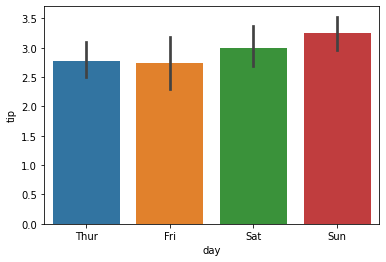

In [ ]:
sns.barplot(data=data, x="day", y="tip")

###Performing a t-test

* Using the Scipy ttest_ind() function to perform a t-test to determine if there is a significant difference in the mean "tip" amount between customers who smoke and those who do not.



In [ ]:

smokersData = data.query("smoker=='Yes'")
nonSmokersData = data.query("smoker=='No'")

t_value,p_value=stats.ttest_ind(smokersData["tip"],nonSmokersData["tip"])
t_test(t_value,p_value,alpha)

Test statistic is 0.092228
p-value for one tailed test is 0.463297
Conclusion: Since p-value(=0.463297) > alpha(=0.05) We do not reject the null hypothesis H0


###Creating a box plot

* Using the Seaborn boxplot() function to create a box plot showing the distribution of "tip" amount by "sex" of the customer.


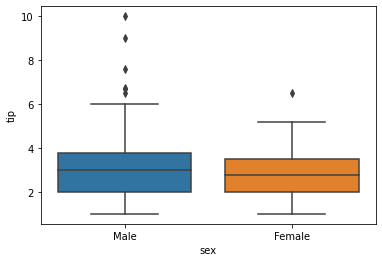

In [ ]:
sns.boxplot(data=data, x="sex", y="tip")

###Performing a linear regression analysis

* Using the Scipy linregress() function to perform a linear regression analysis to predict the "tip" amount based on the "total_bill" and "size" columns.


In [ ]:
slope, intercept, r_value, p_value, std_err=stats.linregress(data['total_bill'], data['tip'])
print("slope: ", slope)
print("intercept: ", intercept)
print("r_value: ", r_value)
print("p_value: ", p_value)
print("std_err: ", std_err)
equation = f'y = {slope} * x + {intercept}'
print("\nLinear regression analysis to predict the tip amount based on the total_bill and size columns: \n{0}.".format(equation))

slope:  0.1050245173843534
intercept:  0.9202696135546726
r_value:  0.6757341092113641
p_value:  6.692470646864404e-34
std_err:  0.007364789848762602

Linear regression analysis to predict the tip amount based on the total_bill and size columns: 
y = 0.1050245173843534 * x + 0.9202696135546726.
